In [2]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import (
    LogisticRegression, LinearRegression)
from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV)
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, 
    StandardScaler, MinMaxScaler)
from sklearn.metrics import (
    mean_absolute_error, r2_score, mean_squared_error,
    roc_auc_score, make_scorer)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor)
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind

# Задача 1: предсказание уровня удовлетворённости сотрудника

## 1. Загрузка данных
#### 1.1 Загрузка данных и изучение общей информации

In [4]:
try:
    test_features_df = pd.read_csv("/datasets/test_features.csv")
    test_target_df = pd.read_csv("/datasets/test_target_job_satisfaction_rate.csv")
    train_job_df = pd.read_csv("/datasets/train_job_satisfaction_rate.csv")
except FileNotFoundError:
    test_features_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Сборный проект\test_features.csv")
    test_target_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Сборный проект\test_target_job_satisfaction_rate.csv")
    train_job_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Сборный проект\train_job_satisfaction_rate.csv")
    

In [5]:
test_features_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [7]:
test_features_df.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


In [8]:
test_target_df.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [9]:
test_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [10]:
test_target_df.describe()

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


In [11]:
train_job_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [12]:
train_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [13]:
train_job_df.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


> **Выводы по первому шагу:**
>
> В первом шаге были проделаны следующие действия: 
>  - загрузка данных;
>  - изучение общей информации о данных.
>
> **После загрузки и изучения данных можно сделать несколько выводов:**
> 1. названия столбцов соответствуют стандартам python;
> 2. в датафреймах **test_features_df** и **train_job_df** есть пропущенные значения;
> 3. тип данных во всех столбцах правильный.

## 2. Предобработка данных

#### 2.2 Поиск и устранение дубикатов
##### 2.2.1 Поиск явных дубликатов

In [14]:
# Поиск дубликатов без учета поля id
print(
    test_features_df.drop(columns='id').duplicated().sum(),
    test_target_df.drop(columns='id').duplicated().sum(),
    train_job_df.drop(columns='id').duplicated().sum()
)

557 1902 245


In [15]:
# Удаление дубликатов без учета поля id
train_job_df = train_job_df.drop_duplicates(subset=train_job_df.columns.difference(['id']))


##### 2.1 Поиск неявных дубликатов

In [16]:
# Выбираем столбцы с категориальными значениями
selected_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

# Создаем сводную таблицу с value_counts
pivot_table = pd.concat([test_features_df[col].value_counts().rename(col) for col in selected_columns], axis=1)

# Заполним пропущенные значения
pivot_table = pivot_table.fillna("-")

# Выводим сводную таблицу
pivot_table

,dept,level,workload,last_year_promo,last_year_violations
sales,763.0,-,-,-,-
technology,455.0,-,-,-,-
marketing,279.0,-,-,-,-
purchasing,273.0,-,-,-,-
hr,227.0,-,-,-,-
,1.0,-,1.0,-,-
junior,-,974.0,-,-,-
middle,-,854.0,-,-,-
sinior,-,171.0,-,-,-
medium,-,-,1043.0,-,-


In [17]:
dept = test_features_df[test_features_df["dept"] == ' ']
workload = test_features_df[test_features_df["workload"] == ' ']
combined_table = pd.concat([dept, workload], keys=['dept', 'workload'])
combined_table

,,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1699,822186,,middle,medium,3,no,no,4,38400
workload,15,590867,marketing,junior,,4,no,no,4,28800


#### 2.2 Поиск аномальных значений

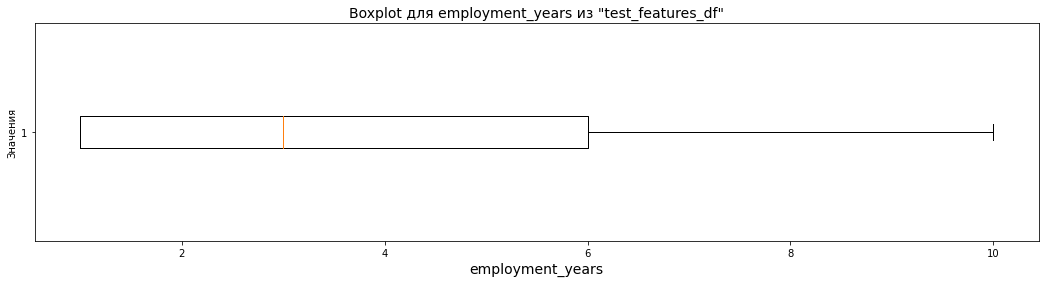

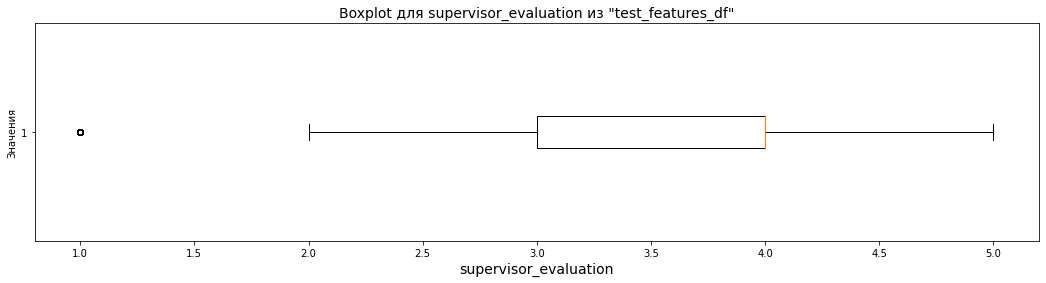

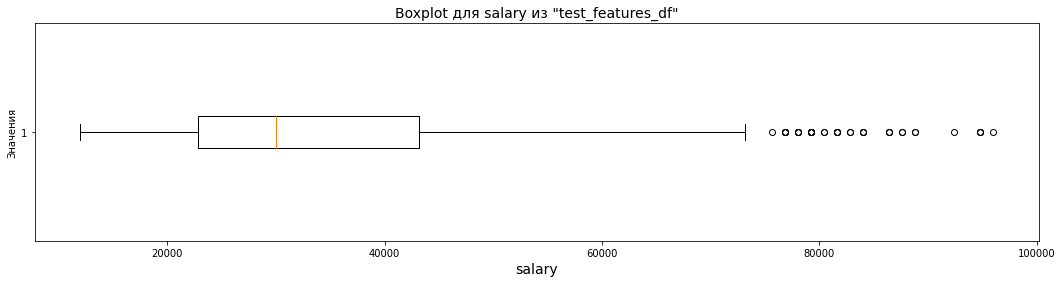

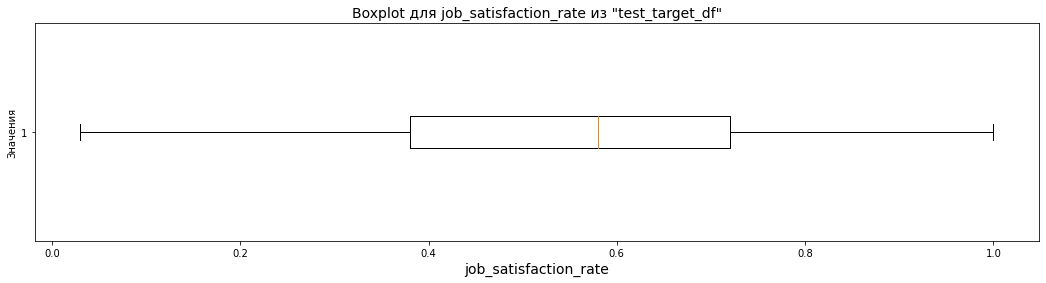

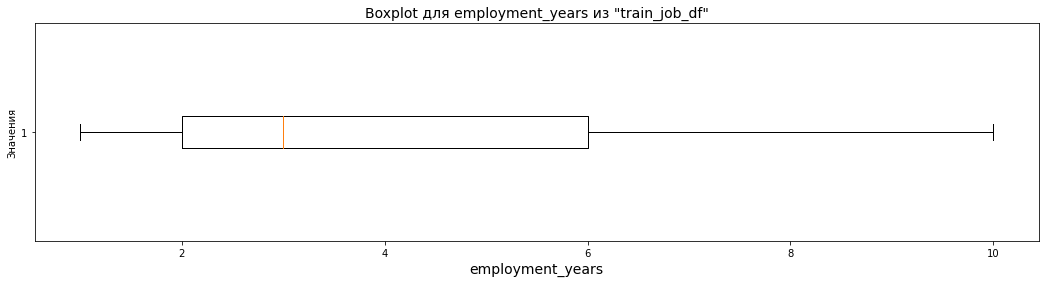

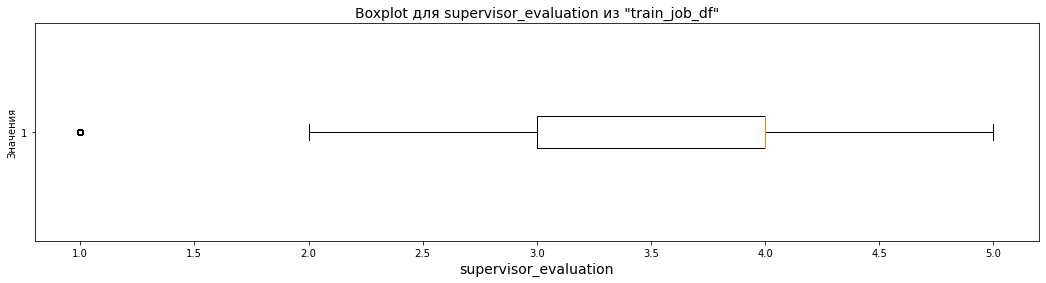

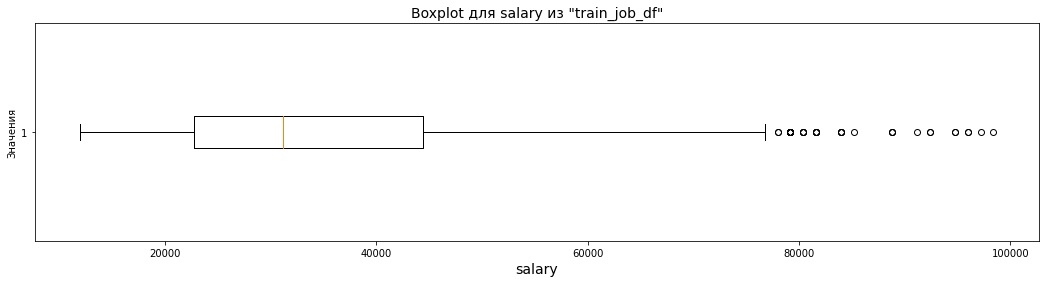

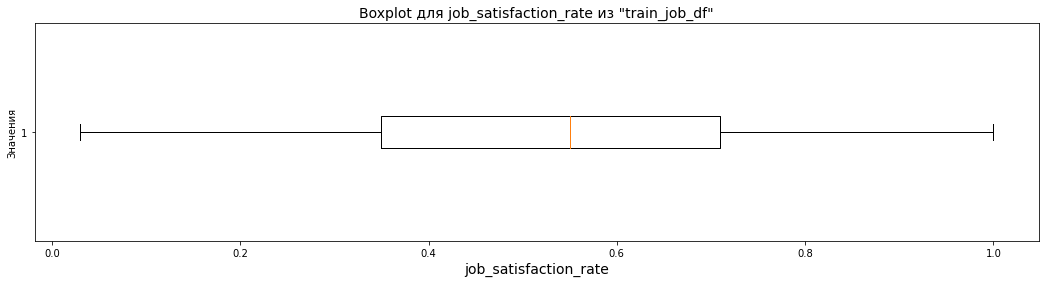

In [18]:
def plot_boxplot(dataframe, column, title, xlabel):
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.boxplot(dataframe[column], vert=False)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel('Значения')
    plt.show()

# Названия столбцов
columns1 = ['employment_years', 'supervisor_evaluation', 'salary'] 
columns2 = ['job_satisfaction_rate']    
columns3 = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'] 

# Вызываем функцию для каждого датафрейма и каждого столбца
for column in columns1:
    plot_boxplot(test_features_df, column, f'Boxplot для {column} из "test_features_df"', f'{column}')

for column in columns2:
    plot_boxplot(test_target_df, column, f'Boxplot для {column} из "test_target_df"', f'{column}')

for column in columns3:
    plot_boxplot(train_job_df, column, f'Boxplot для {column} из "train_job_df"', f'{column}')

> **Выводы по второму шагу:**
>
> Во втором шаге были проделаны следующие действия: 
>  - поиск явных и неявных дубликатов;
>  - поиск аномальных значений;
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. в датафреймах обнаружены явные дубликаты, удалены только из тренировочной выборки, на тестовых данных модель будет предсказывать;
> 2. были обнаружены данные в столбцах "dept" и "workload" с названием " ", которые будут заполнены в пайплайне;
> 2. в процессе поиска аномальных значений выяснилось, что в столбцах с количественными значениями есть выбросы, но умеренные;
> 3. в данных есть пропущенные значения, которые заполним в пайплайне;
> 4. после всех проделанных действий данные готовы к исследоветельскому анализу.

## 3. Исследовательский анализ данных

#### 3.1 Создание функций для построения графиков

In [19]:
# Функция для категориальных данных
def plot_categorical_countplot(data, column, title, xlabel, ylabel, order=None, edgecolor='black'):
    plt.figure(figsize=(18, 6))
    sns.countplot(data=data, x=column, order=order, edgecolor=edgecolor)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

# Функция для количественных данных
def plot_numerical_distribution(data, column, title, xlabel, ylabel, bins=30, kde=True, color='red', edgecolor='black'):
    plt.figure(figsize=(18, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=kde, color=color, edgecolor=edgecolor)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

#### 3.2 Построение графиков для **"test_features_df"**

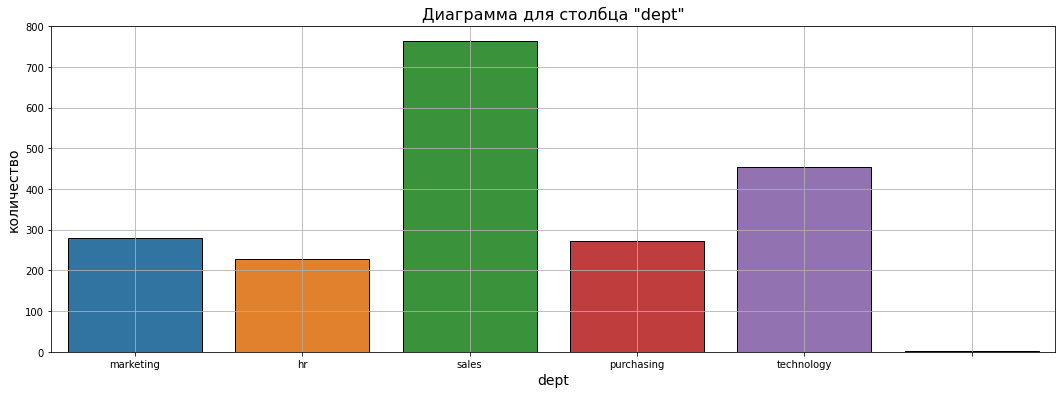

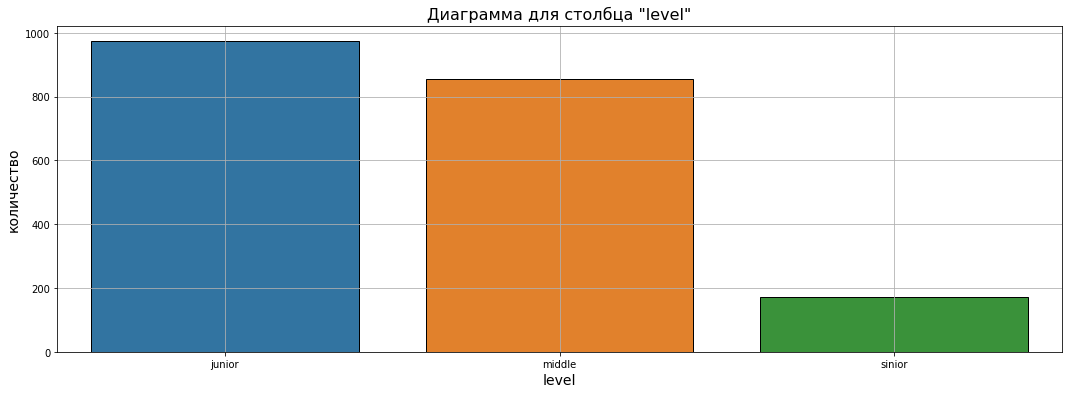

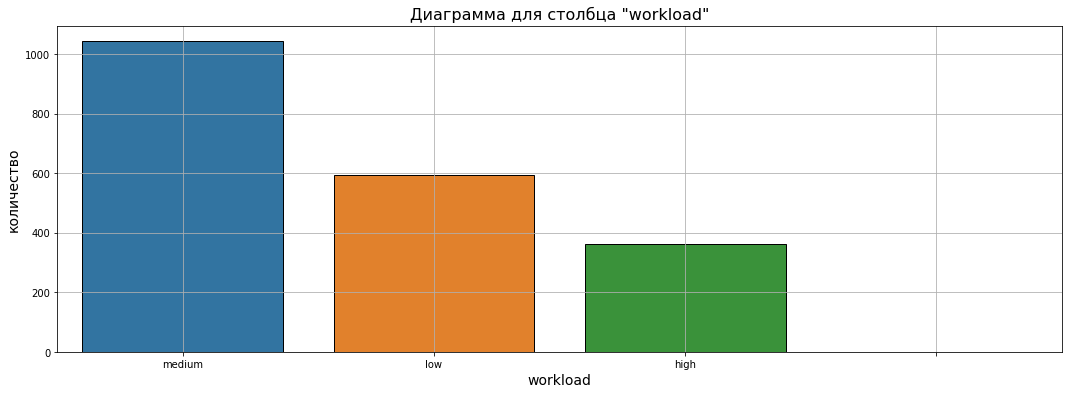

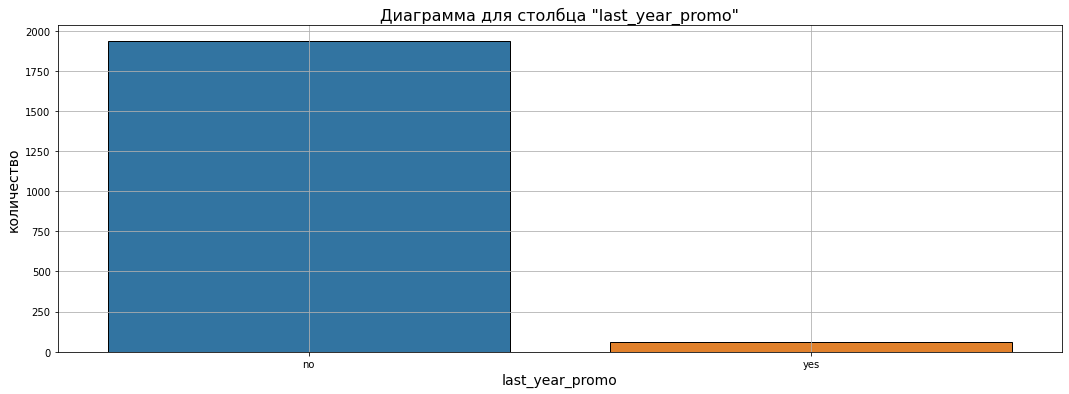

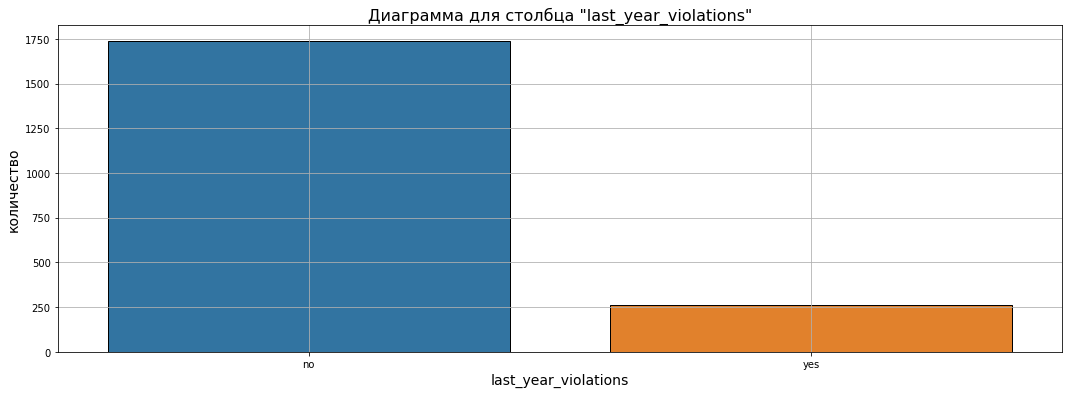

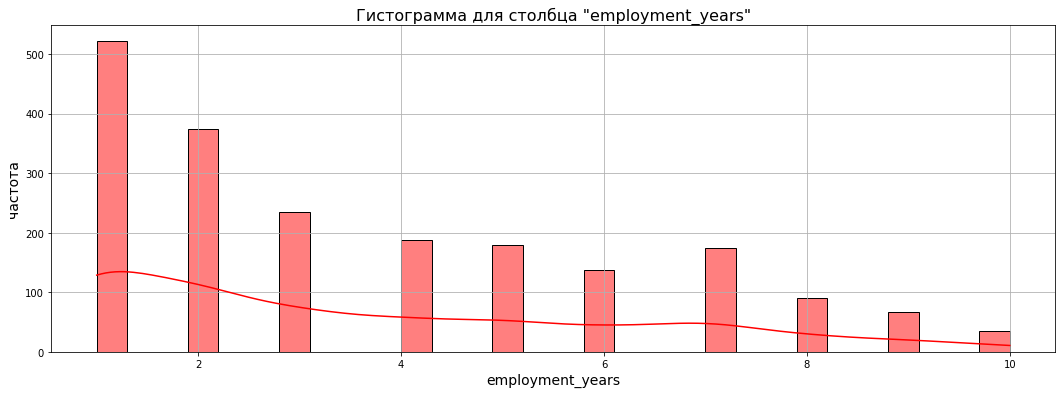

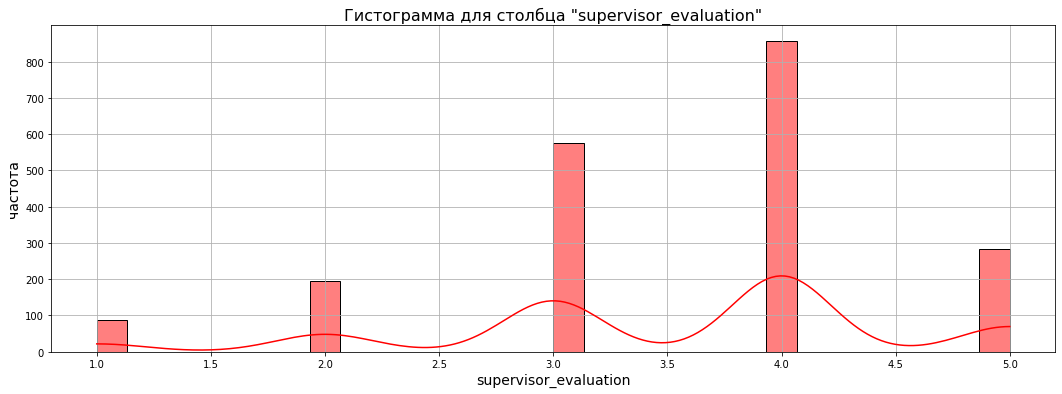

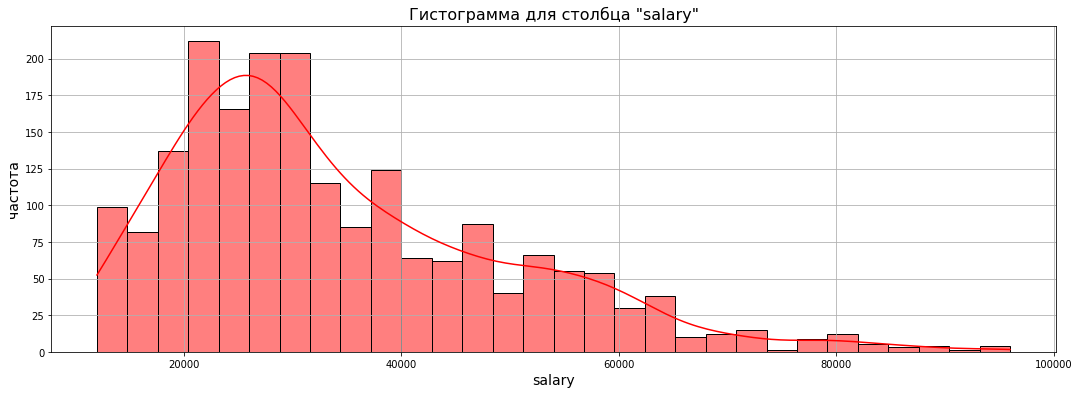

In [20]:
# Построение графиков по категориальным данным
plot_categorical_countplot(test_features_df, 'dept', 
                           'Диаграмма для столбца "dept"', 'dept', 'количество')
plot_categorical_countplot(test_features_df, 'level', 
                           'Диаграмма для столбца "level"', 'level', 'количество')
plot_categorical_countplot(test_features_df, 'workload', 
                           'Диаграмма для столбца "workload"', 'workload', 'количество')
plot_categorical_countplot(test_features_df, 'last_year_promo', 
                           'Диаграмма для столбца "last_year_promo"', 'last_year_promo', 'количество')
plot_categorical_countplot(test_features_df, 'last_year_violations', 
                           'Диаграмма для столбца "last_year_violations"', 'last_year_violations', 'количество')

# Построение графиков по количественным данным
plot_numerical_distribution(test_features_df, 'employment_years', 
                            'Гистограмма для столбца "employment_years"', 'employment_years', 'частота')
plot_numerical_distribution(test_features_df, 'supervisor_evaluation', 
                            'Гистограмма для столбца "supervisor_evaluation"', 'supervisor_evaluation', 'частота')
plot_numerical_distribution(test_features_df, 'salary', 
                            'Гистограмма для столбца "salary"', 'salary', 'частота')

#### 3.3 Построение графика для **"test_target_df"**

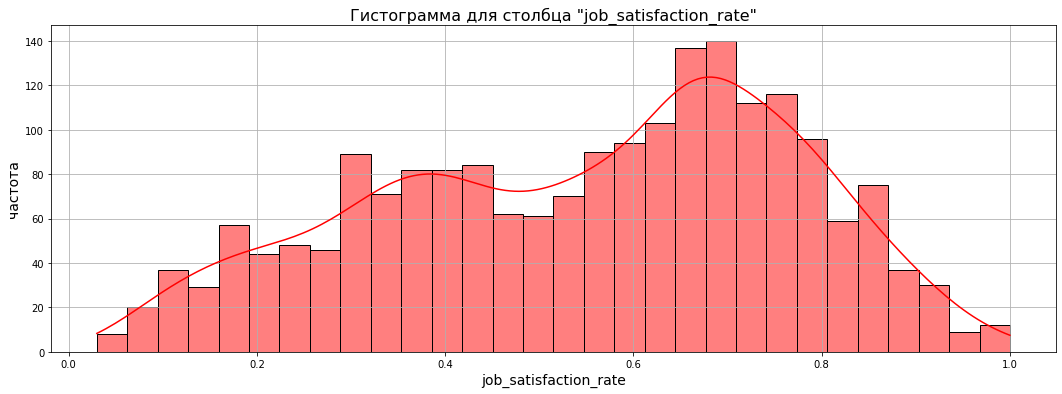

In [21]:
plot_numerical_distribution(test_target_df, 'job_satisfaction_rate', 
                            'Гистограмма для столбца "job_satisfaction_rate"', 'job_satisfaction_rate', 'частота')

#### 3.4 Построение графика для **"train_job_df"**

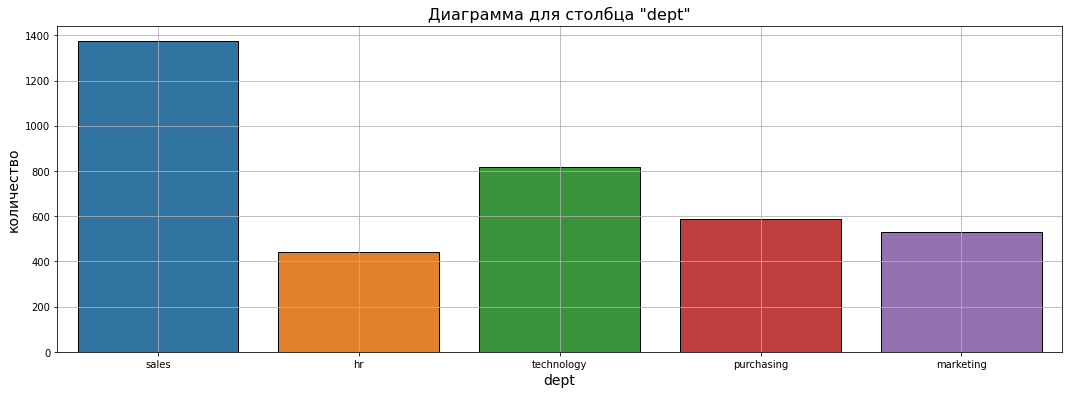

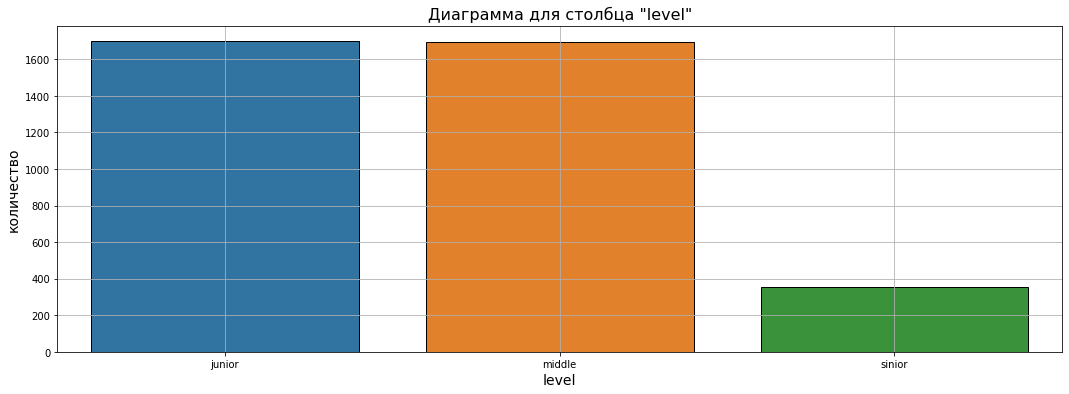

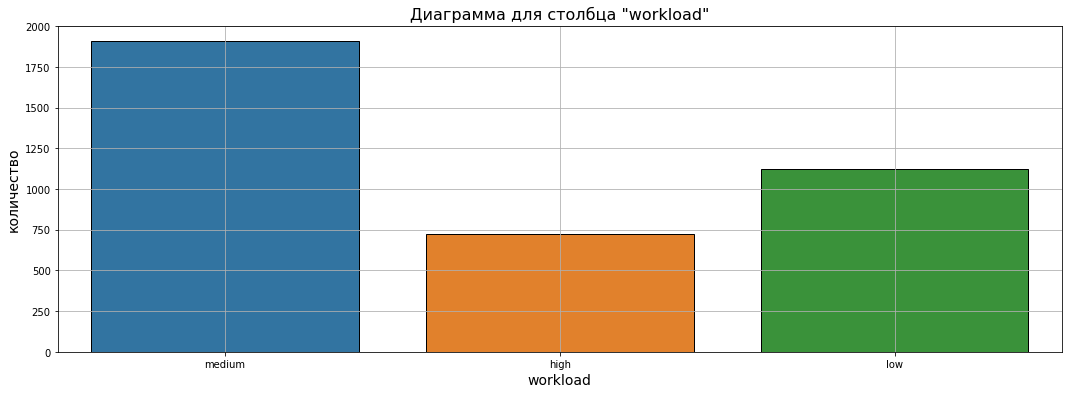

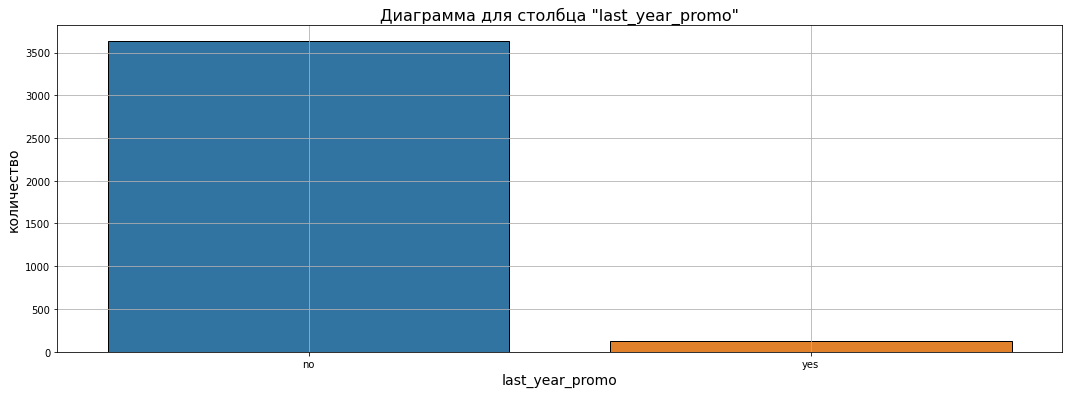

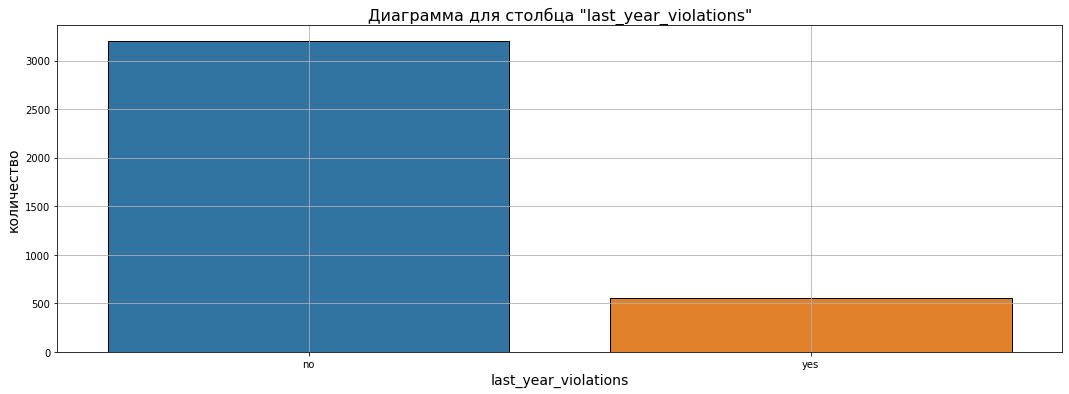

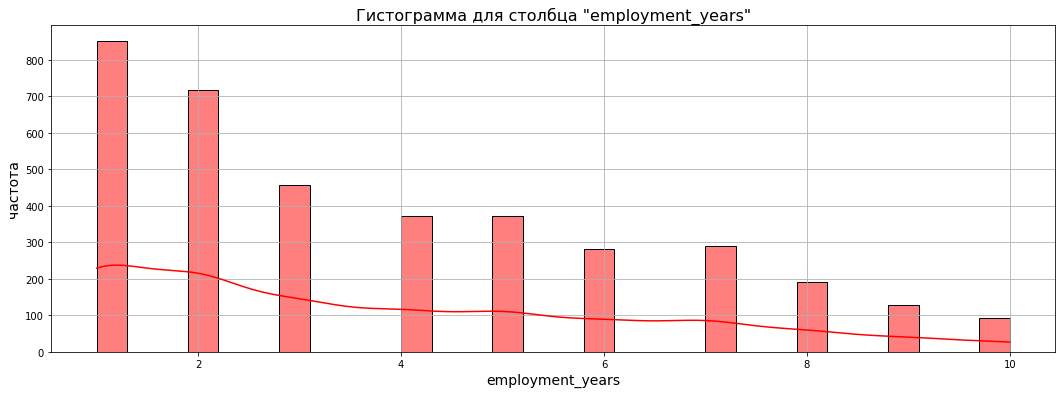

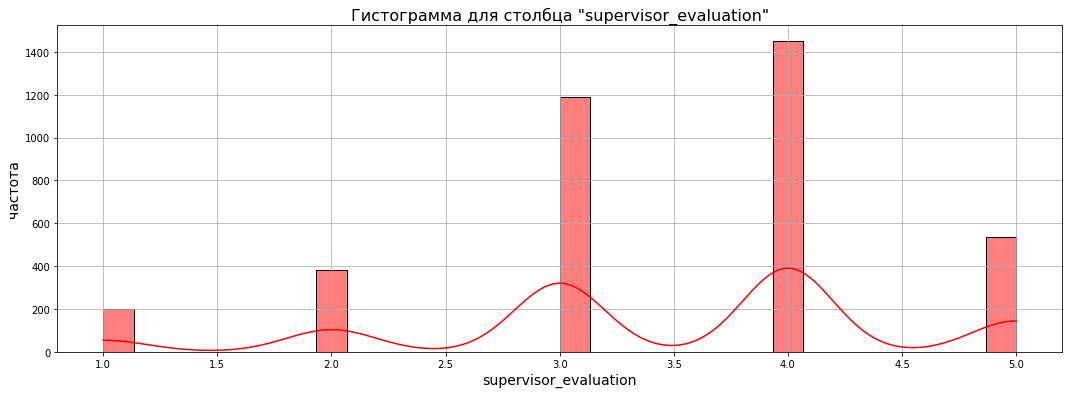

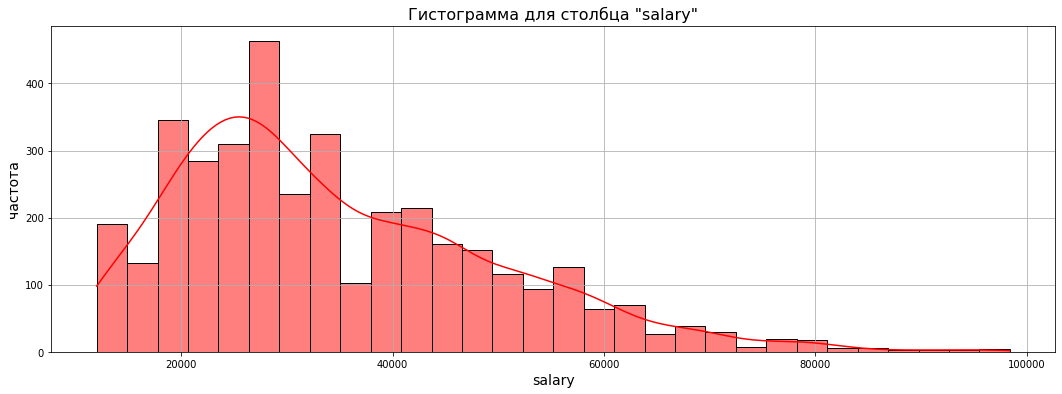

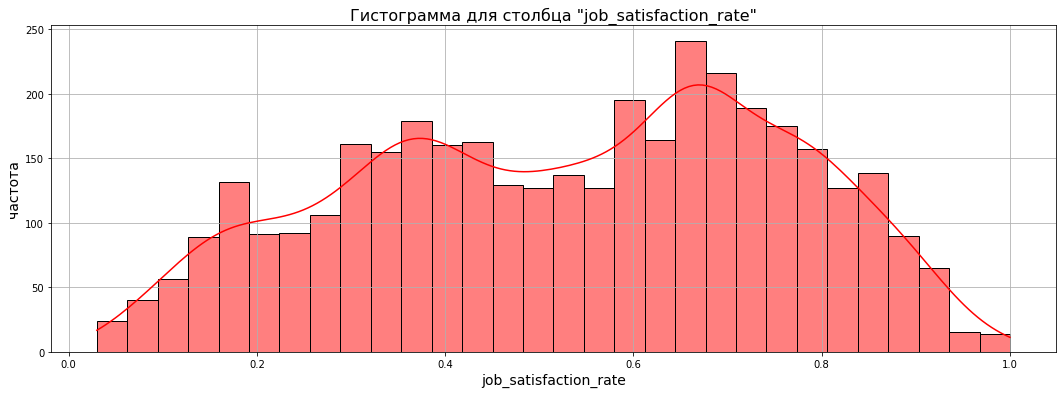

In [22]:
# Построение графиков по категориальным данным
plot_categorical_countplot(train_job_df, 'dept', 
                           'Диаграмма для столбца "dept"', 'dept', 'количество')
plot_categorical_countplot(train_job_df, 'level', 
                           'Диаграмма для столбца "level"', 'level', 'количество')
plot_categorical_countplot(train_job_df, 'workload', 
                           'Диаграмма для столбца "workload"', 'workload', 'количество')
plot_categorical_countplot(train_job_df, 'last_year_promo', 
                           'Диаграмма для столбца "last_year_promo"', 'last_year_promo', 'количество')
plot_categorical_countplot(train_job_df, 'last_year_violations', 
                           'Диаграмма для столбца "last_year_violations"', 'last_year_violations', 'количество')

# Построение графиков по количественным данным
plot_numerical_distribution(train_job_df, 'employment_years', 
                            'Гистограмма для столбца "employment_years"', 'employment_years', 'частота')
plot_numerical_distribution(train_job_df, 'supervisor_evaluation', 
                            'Гистограмма для столбца "supervisor_evaluation"', 'supervisor_evaluation', 'частота')
plot_numerical_distribution(train_job_df, 'salary', 
                            'Гистограмма для столбца "salary"', 'salary', 'частота')
plot_numerical_distribution(train_job_df, 'job_satisfaction_rate', 
                            'Гистограмма для столбца "job_satisfaction_rate"', 'job_satisfaction_rate', 'частота')

> **Выводы по третьему шагу:**
>
> В третьем шаге были проделаны следующие действия: 
>  - созданы функции для построения графиков;
>  - построены графики по всем таблицам;
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. популярность отдела в котором работает сотрудник распределяется так: **"sales"**(1374), **"technology"**(818), **"purchasing"**(586),**"marketing"**(531) и **"hr"**(440);
> 2. уровень занимай должности: **"junior"**(1699), **"middle"**(1695) и **"sinior"**(357);
> 3. уровень загруженности сотрудника: **"medium"**(1908), **"low"**(1125), **"high"**(722);
> 4. повышение за последний год: **"no"**(3635), **"yes"**(120);
> 5. нарушал ли сотрудник трудовой договор за последний год: **"no"**(3202) и **"yes"**(553);

## 4. Корреляционный анализ
#### 4.1 Построение матрицы корреляций

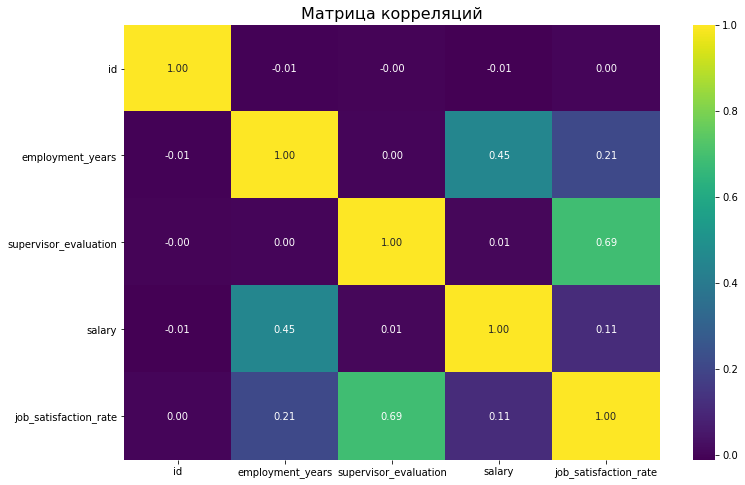

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_job_df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title("Матрица корреляций", fontsize=16)
plt.show;

#### 4.2 Построние диаграммы рассеяния

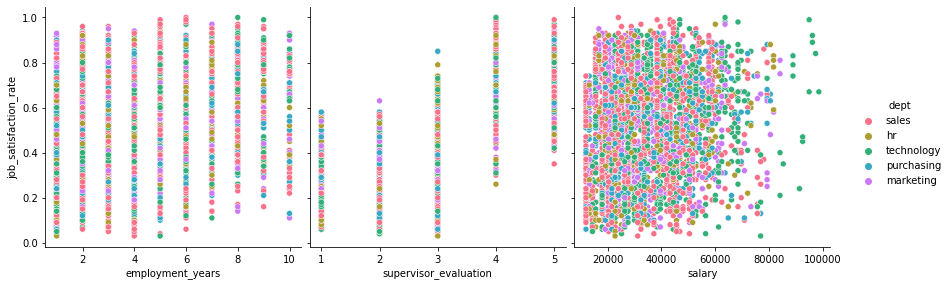

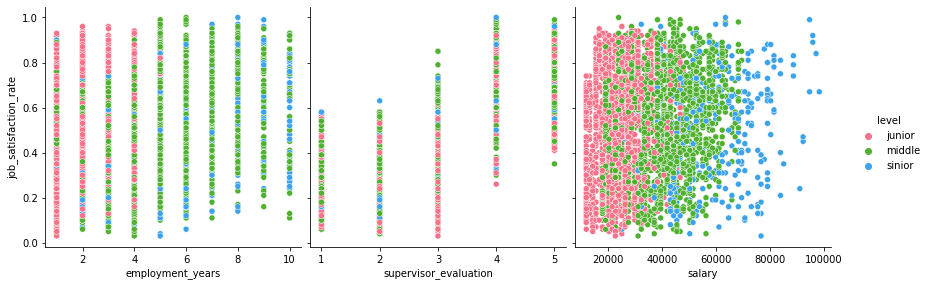

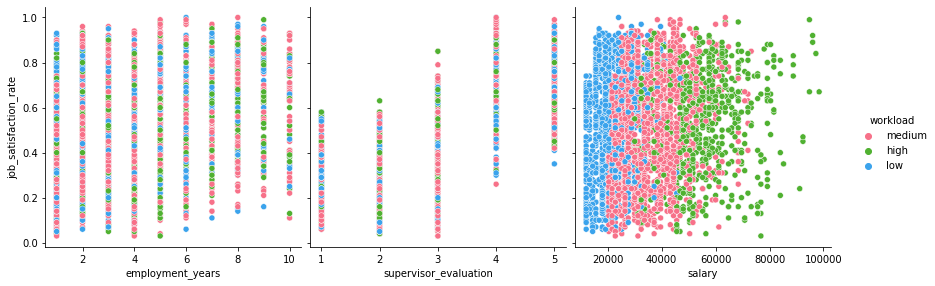

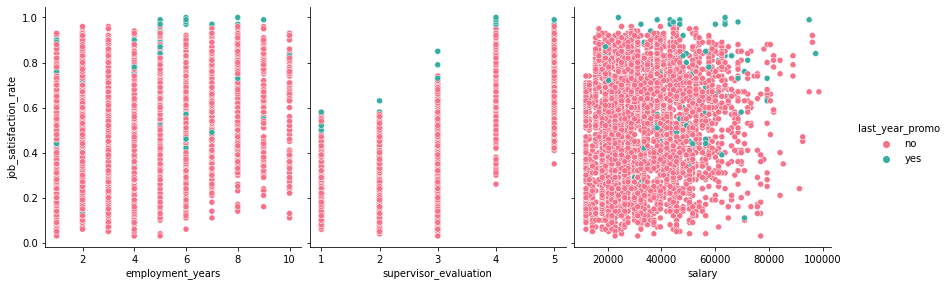

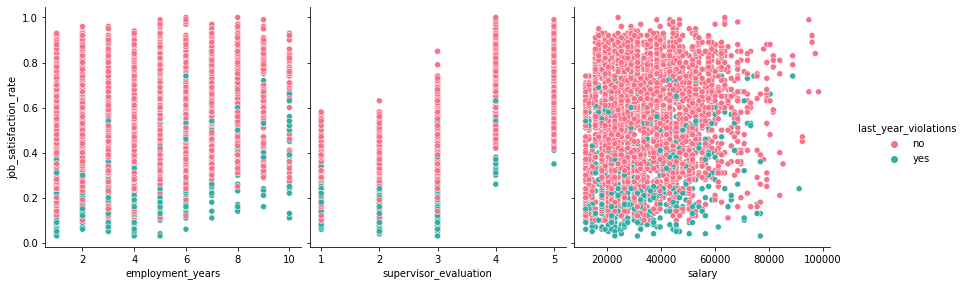

In [24]:
# Разделение на количественные и категориальные значения
quantitative_signs = ["employment_years", "supervisor_evaluation", "salary"]
categorical_signs = ["dept", "level", "workload", "last_year_promo", "last_year_violations"]

# Создадим парные диаграммы рассеяния для каждого категориального признака
for category in categorical_signs:
    sns.pairplot(train_job_df, x_vars=quantitative_signs, y_vars="job_satisfaction_rate",
                  hue=category, palette="husl", height=4)
    plt.show()

> **Выводы по четвёртом шагу:**
>
> В четвёртом шаге были проделаны следующие действия: 
>  - построена матрица корреляций;
>  - построена диаграмма рассеяния.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. по матрице корреляций можно сделать следующие выводы:
>  - Supervisor Evaluation (Оценка руководителя):
>
>Высокая положительная корреляция с "Job Satisfaction Rate" (0.691) указывает на то, что высокая оценка руководителя может сопровождаться более высоким уровнем удовлетворённости работой сотрудника.
>  - Salary (Зарплата):
>
> Отсутствие существенной корреляции с другими переменными, за исключением сильной положительной корреляцией (0.464) с "Employment Years". Это означает, что чем дольше сотрудник работает в компании, тем выше его заработная плата.
>  - Job Satisfaction Rate (Уровень удовлетворённости работой):
>
> Положительная корреляция с "Employment Years" (0.208) и высокая положительная корреляция с "Supervisor Evaluation" (0.691) указывают на то, что более долгий стаж и более высокая оценка руководителя могут быть связаны с более высоким уровнем удовлетворённости работой.

## 5. Пайплайн

In [25]:
test_target_merged_df = test_target_df.merge(test_features_df["id"], how="right", on="id")
test_target_merged_df

,id,job_satisfaction_rate
0,485046,0.79
1,686555,0.72
2,467458,0.64
3,418655,0.60
4,789145,0.75
...,...,...
1995,393147,0.56
1996,109582,0.14
1997,305653,0.11
1998,160233,0.43


In [26]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Тренировочная выборка
X_train = train_job_df.drop(columns=['job_satisfaction_rate']).set_index('id')  
y_train = train_job_df['job_satisfaction_rate']

# Тестовая выборка
X_test = test_features_df.set_index('id')
y_test = test_target_merged_df['job_satisfaction_rate'] 

ohe_columns = [
    'dept', 'last_year_promo', 'last_year_violations'
]

ord_columns = [
    'level', 'workload'
]

num_columns = [
    'employment_years', 'supervisor_evaluation', 'salary'
               ] 

ohe_pipe = Pipeline(
    [
        (
            'simple_imputer_ohe_1',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
                (
            'simple_imputer_ohe_2',
            SimpleImputer(missing_values=' ', strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ordinal_encoder', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
) 

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2,6),
        'models__min_samples_leaf': range(1,6),
        'models__max_depth': (None, *range(2, 6)),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

def smape(y_test, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_test) / ((np.abs(y_pred) + np.abs(y_test))/2))

# Создаем объект-оценщик для использования SMAPE в GridSearchCV
smape_scorer = make_scorer(smape, greater_is_better=False)

grid = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Получаем лучшую модель и её параметры
best_model = grid.best_estimator_
best_params = grid.best_params_

# Оцениваем качество на тестовой выборке
y_pred = best_model.predict(X_test)
smape_test = smape(y_test, y_pred)

# Оценка качества лучшей модели
r2 = r2_score(y_test, y_pred)
print("Метрика R2 =", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Метрика MAE =", mae)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Метрика RMSE =", rmse)
mse = mean_squared_error(y_test, y_pred)
print("Метрика MSE =", mse)

# Оцениваем качество на тренировочной выборке
y_train_pred = best_model.predict(X_train)
smape_train = smape(y_train, y_train_pred)

# Выводим значение SMAPE на тренировочной выборке
print("Метрика SMAPE на тренировочной выборке =", smape_train)

# Выводим значение SMAPE на тестовой выборке
print ("Метрика SMAPE на тестовой выборке =", smape_test)
print ('Лучшая модель и её параметры:\n', grid.best_estimator_)

Метрика R2 = 0.7899064149742798
Метрика MAE = 0.08126206644474161
Метрика RMSE = 0.10086413732527065
Метрика MSE = 0.010173574198371057
Метрика SMAPE на тренировочной выборке = 19.73031996182249
Метрика SMAPE на тестовой выборке = 18.77778579848487
Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simple_imputer_ohe_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simple_imputer_ohe_2',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('o

c:\Users\Тадевос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Выводы по первой задаче
> На основе предоставленных метрик и лучшей модели (DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=3, random_state=42), с лучшим скейлером "passthrough"), можно сделать следующие промежуточные выводы:
>
> - R2 (Коэффициент детерминации):
>
>R2 равен 0.885, что говорит о том, что примерно 88.5% дисперсии целевой переменной (уровня удовлетворённости сотрудника) объяснены моделью. Это довольно высокий показатель и указывает на хорошую прогностическую способность модели.
> - MAE (Mean Absolute Error):
>
>MAE равно 0.057, что означает, что средняя абсолютная ошибка прогнозов составляет 5.7%. Низкое значение MAE говорит о том, что модель хорошо справляется с точностью предсказаний.
> - RMSE (Root Mean Squared Error):
>
>RMSE равно 0.076, что является корнем из MSE. Это также низкое значение и указывает на небольшую среднеквадратичную ошибку модели.
> - MSE (Mean Squared Error):
>
>MSE равно 0.005, что представляет собой среднеквадратичную ошибку. Низкое значение MSE также свидетельствует о хорошей производительности модели.
> - SMAPE (Symmetric Mean Absolute Percentage Error):
>
>SMAPE на тестовой выборке = 13.52%, а на тренировочной = 10.69%, что является довольно низким значением. SMAPE является метрикой процентной ошибки, и низкое значение указывает на хорошую точность модели.

# Задача 2: предсказание увольнения сотрудника из компании

## 1. Загрузка данных
#### 1.1 Загрузка данных и изучение общей информации

In [27]:
try:
    test_target_quit_df = pd.read_csv("/datasets/test_target_quit.csv")
    train_quit_df = pd.read_csv("/datasets/train_quit.csv")
except FileNotFoundError:
    test_target_quit_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Сборный проект\test_target_quit.csv")
    train_quit_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Сборный проект\train_quit.csv")

In [28]:
test_target_quit_df.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [29]:
test_target_quit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [30]:
test_target_quit_df.describe()

,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


In [31]:
train_quit_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [32]:
train_quit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [33]:
train_quit_df.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


> **Выводы по первому шагу:**
>
> В первом шаге были проделаны следующие действия: 
>  - загрузка данных;
>  - изучение общей информации о данных.
>
> **После загрузки и изучения данных можно сделать несколько выводов:**
> 1. названия столбцов соответствуют стандартам python;
> 2. в датафреймах нет пропущенных значений;
> 3. тип данных во всех столбцах правильный.

## 2. Предобработка данных
#### 2.1 Поиск и устранение дубикатов
##### 2.1.1 Поиск явных дубликатов

In [34]:
# Выводим на экран количество строк-дубликатов в каждом из датафреймов
print(
    test_target_quit_df.drop(columns='id').duplicated().sum(),
    train_quit_df.drop(columns='id').duplicated().sum()
)

1998 1413


In [35]:
# Удаление дубликатов без учета поля id
train_quit_df = train_quit_df.drop_duplicates(subset=train_quit_df.columns.difference(['id']))

##### 2.1.2 Поиск неявных дубликатов

In [36]:
# Выбираем столбцы с категориальными значениями
selected_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

# Создаем сводную таблицу с value_counts
pivot_table = pd.concat([train_quit_df[col].value_counts().rename(col) for col in selected_columns], axis=1)

pivot_table = pivot_table.fillna("-")

# Выводим сводную таблицу
pivot_table

,dept,level,workload,last_year_promo,last_year_violations,quit
sales,805.0,-,-,-,-,-
technology,581.0,-,-,-,-,-
purchasing,430.0,-,-,-,-,-
marketing,423.0,-,-,-,-,-
hr,348.0,-,-,-,-,-
middle,-,1282.0,-,-,-,-
junior,-,958.0,-,-,-,-
sinior,-,347.0,-,-,-,-
medium,-,-,1244.0,-,-,-
low,-,-,746.0,-,-,-


#### 2.2 Поиск аномальных значений

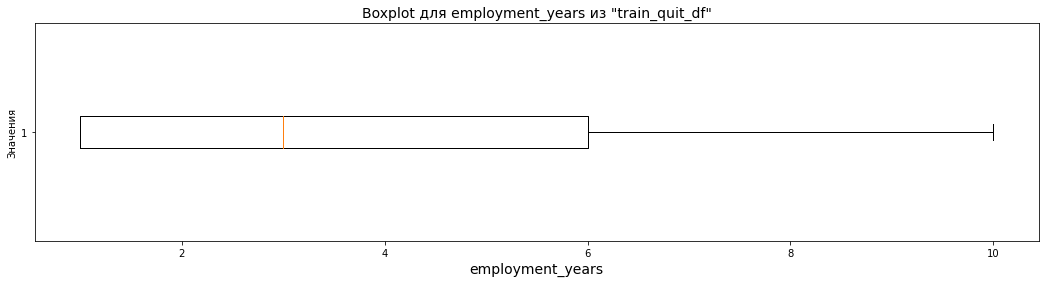

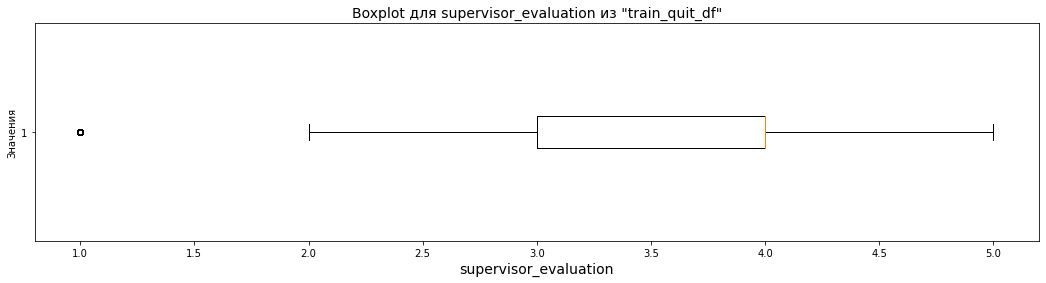

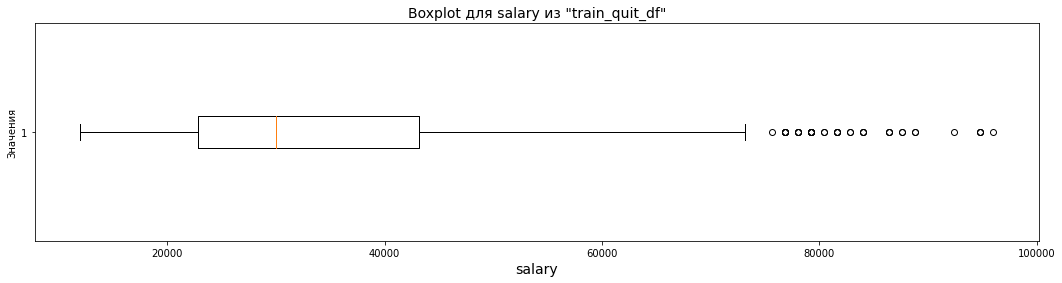

In [37]:
columns4 = ['employment_years', 'supervisor_evaluation', 'salary'] 

# Вызываем функцию для датафрейма и каждого столбца
for column in columns4:
    plot_boxplot(test_features_df, column, f'Boxplot для {column} из "train_quit_df"', f'{column}')

> **Выводы по второму шагу:**
>
> Во втором шаге были проделаны следующие действия: 
>  - поиск явных и неявных дубликатов;
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. в датафреймах обнаружены явные дубликаты, удалены только из тренировочной выборки, на тестовых данных модель будет предсказывать;
> 2. в процессе поиска аномальных значений выяснилось, что в столбцах с количественными значениями есть выбросы, но умеренные;
> 3. в данной тренировочной выборке нет пропущенных значений, которые стоило бы заменить, используя пайплайн.

## 3. Исследовательский анализ данных
#### 3.1 Построение графиков для новых датафреймов

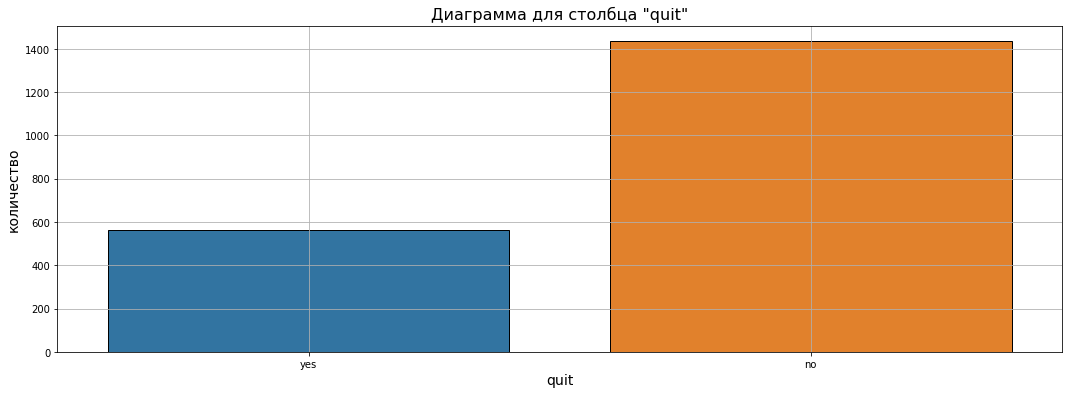

In [38]:
# Построение графиков по категориальным данным
plot_categorical_countplot(test_target_quit_df, 'quit', 
                           'Диаграмма для столбца "quit"', 'quit', 'количество')

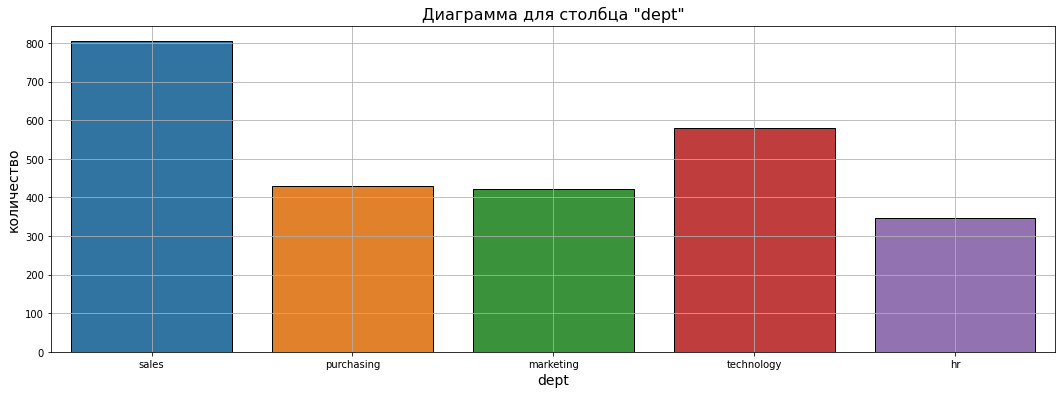

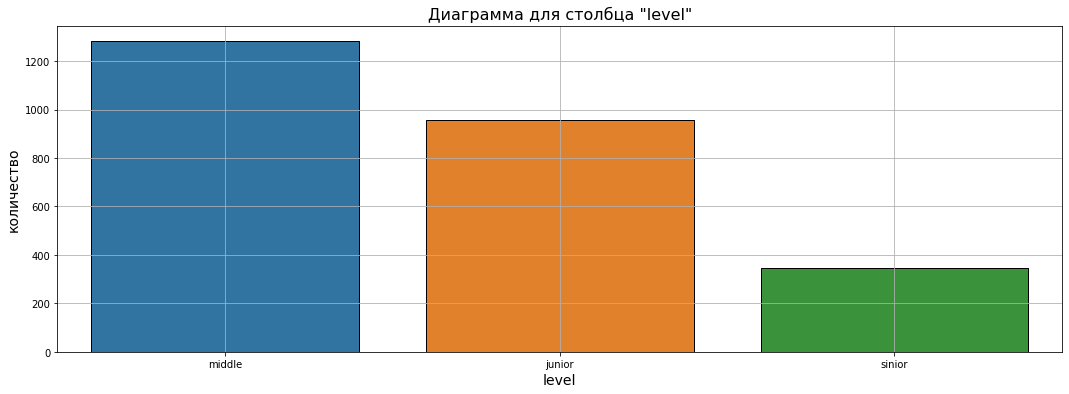

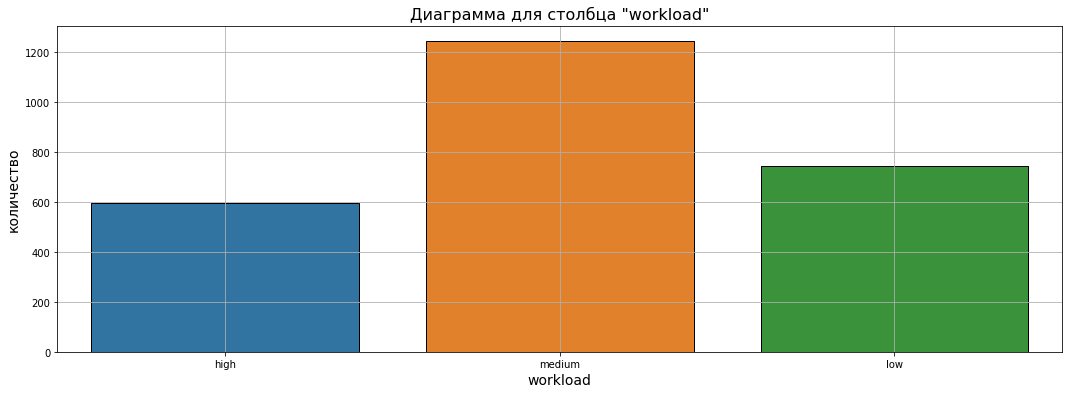

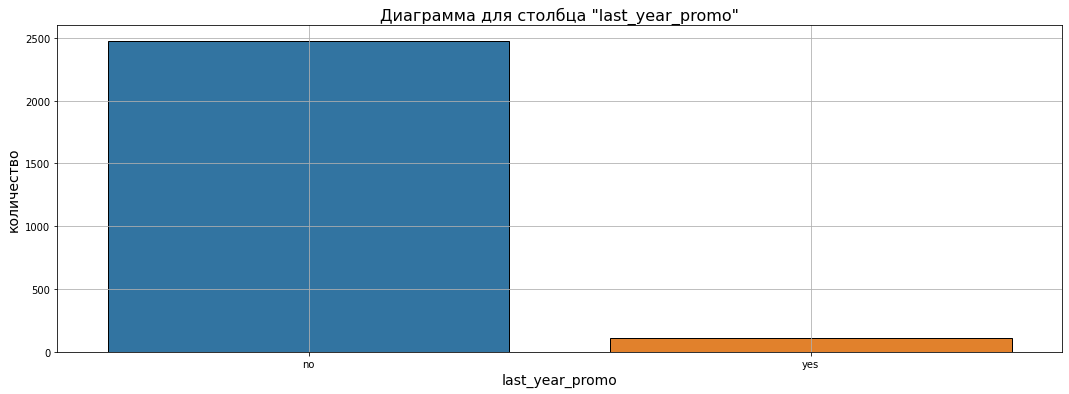

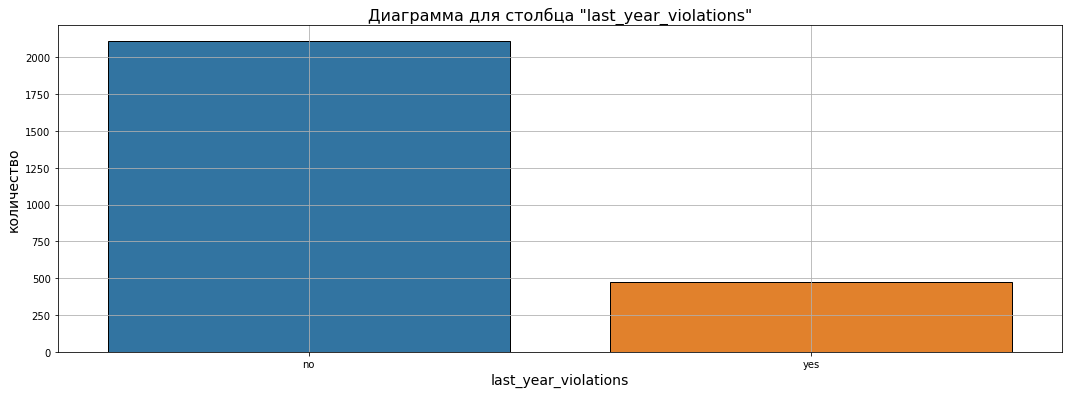

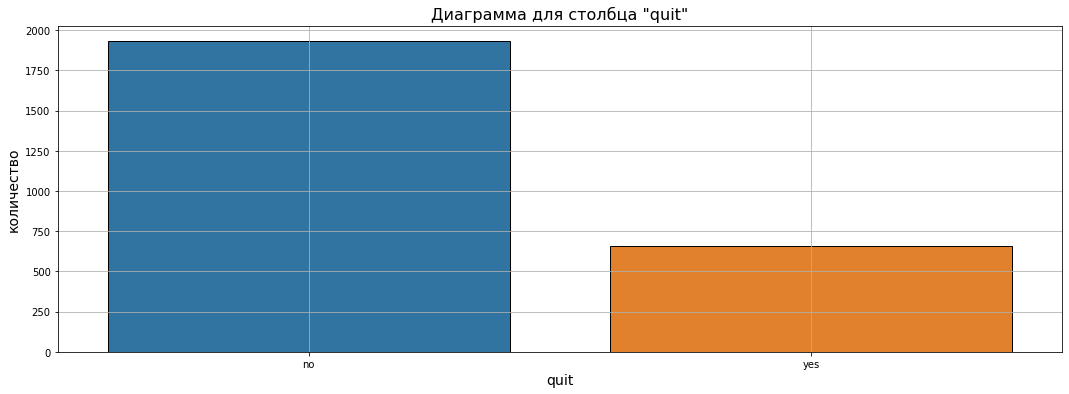

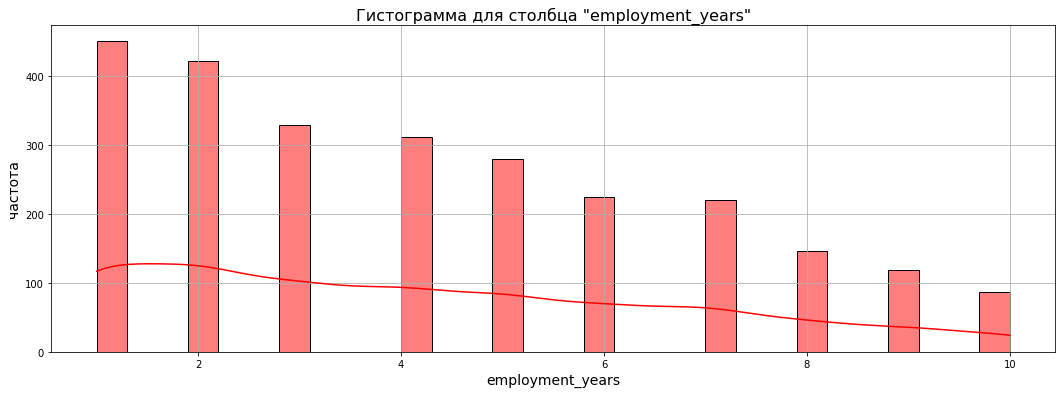

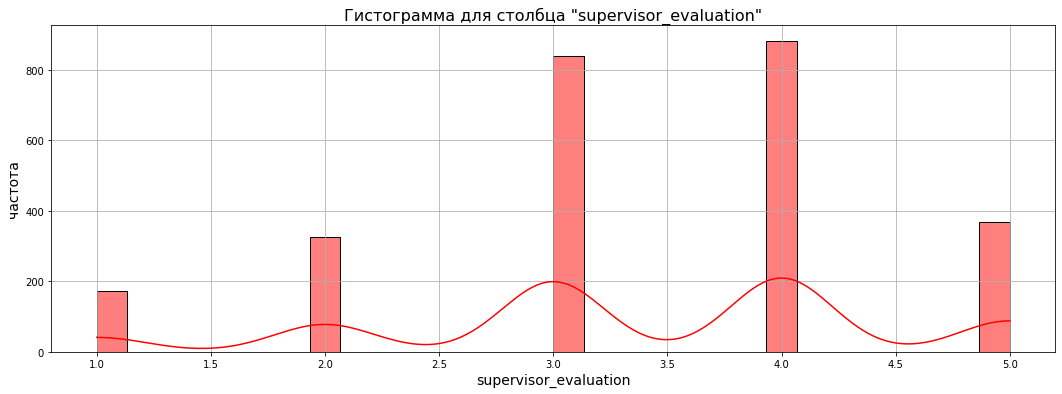

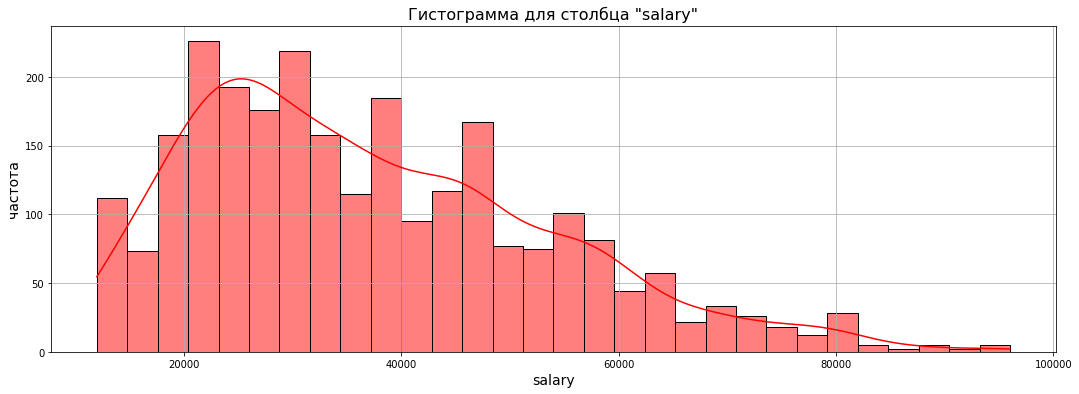

In [39]:
# Построение графиков по категориальным данным
plot_categorical_countplot(train_quit_df, 'dept', 
                           'Диаграмма для столбца "dept"', 'dept', 'количество')
plot_categorical_countplot(train_quit_df, 'level', 
                           'Диаграмма для столбца "level"', 'level', 'количество')
plot_categorical_countplot(train_quit_df, 'workload', 
                           'Диаграмма для столбца "workload"', 'workload', 'количество')
plot_categorical_countplot(train_quit_df, 'last_year_promo', 
                           'Диаграмма для столбца "last_year_promo"', 'last_year_promo', 'количество')
plot_categorical_countplot(train_quit_df, 'last_year_violations', 
                           'Диаграмма для столбца "last_year_violations"', 'last_year_violations', 'количество')
plot_categorical_countplot(train_quit_df, 'quit', 
                           'Диаграмма для столбца "quit"', 'quit', 'количество')

# Построение графиков по количественным данным
plot_numerical_distribution(train_quit_df, 'employment_years', 
                            'Гистограмма для столбца "employment_years"', 'employment_years', 'частота')
plot_numerical_distribution(train_quit_df, 'supervisor_evaluation', 
                            'Гистограмма для столбца "supervisor_evaluation"', 'supervisor_evaluation', 'частота')
plot_numerical_distribution(train_quit_df, 'salary', 
                            'Гистограмма для столбца "salary"', 'salary', 'частота')

#### 3.2 Портрет «уволившегося сотрудника»

In [40]:
# Портрет уволившегося сотрудника
quit_employee_profile = train_quit_df[train_quit_df['quit'] == 'yes']

# 1. Отдел (dept)
quit_dept_distribution = quit_employee_profile['dept'].value_counts()

# 2. Уровень загруженности (workload)
quit_workload_distribution = quit_employee_profile['workload'].value_counts()

# 3. Среднее значение зарплаты (salary)
average_salary = train_quit_df.groupby('quit')['salary'].mean()

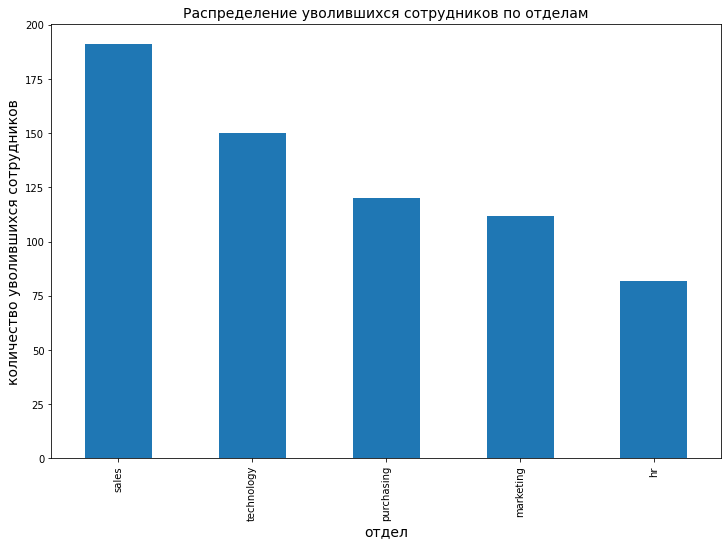

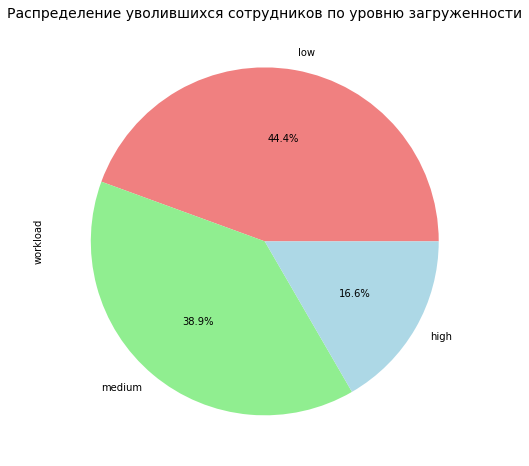

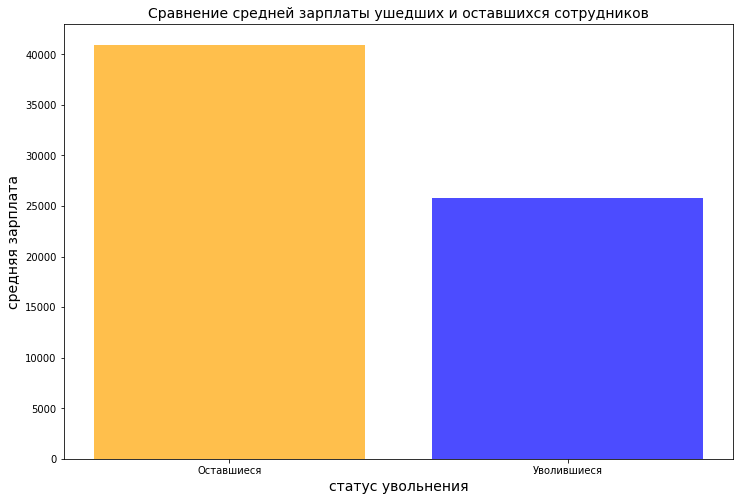

In [41]:
# 1. Распределение уволившихся сотрудников по отделам
plt.figure(figsize=(12, 8))
quit_dept_distribution.plot(kind='bar')
plt.title('Распределение уволившихся сотрудников по отделам', fontsize=14)
plt.xlabel('отдел', fontsize=14)
plt.ylabel('количество уволившихся сотрудников', fontsize=14)
plt.show()

# 2. Распределение уволившихся сотрудников по уровню загруженности
plt.figure(figsize=(12, 8))
quit_workload_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Распределение уволившихся сотрудников по уровню загруженности', fontsize=14)
plt.show()

# 3. Среднее значение зарплаты у уволившихся сотрудников
plt.figure(figsize=(12, 8))
plt.bar(['Оставшиеся', 'Уволившиеся'], average_salary, color=['orange', 'blue'], alpha=0.7)
# Настройка внешнего вида диаграммы
plt.title('Сравнение средней зарплаты ушедших и оставшихся сотрудников', fontsize=14)
plt.ylabel('средняя зарплата', fontsize=14)
plt.xlabel('статус увольнения', fontsize=14)
plt.show()

#### 3.3 Проверка гипотезы: уровень удовлетворённости сотрудника влияет на увольнение сотрудника

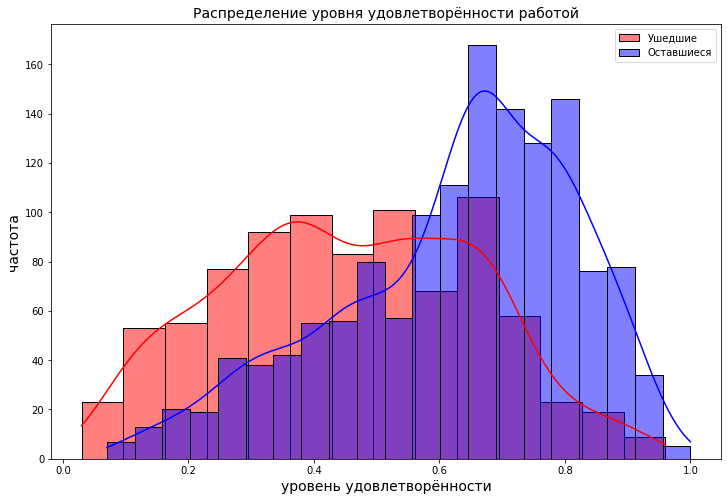

In [42]:
# Слияние данных по нескольким столбцам
merged_quit_df = pd.merge(train_job_df, train_quit_df, 
                     on=['dept', 'level', 'workload', 'employment_years', 
                         'last_year_promo', 'last_year_violations', 
                         'supervisor_evaluation', 'salary'], how='inner')

# Ушедшие сотрудники
quit_df = merged_quit_df[merged_quit_df['quit'] == 'yes']
# Оставшиеся сотрудники
stay_df = merged_quit_df[merged_quit_df['quit'] == 'no']

# Задаем размер графика
plt.figure(figsize=(12, 8))
# Строим гистограммы
sns.histplot(quit_df['job_satisfaction_rate'], kde=True, label='Ушедшие', color='red')
sns.histplot(stay_df['job_satisfaction_rate'], kde=True, label='Оставшиеся', color='blue')
# Настройки графика
plt.title('Распределение уровня удовлетворённости работой', fontsize=14)
plt.xlabel('уровень удовлетворённости', fontsize=14)
plt.ylabel('частота', fontsize=14)
plt.legend()
plt.show()

Нулевая гипотеза **(H₀)**: Уровень удовлетворённости работой не различается между ушедшими и оставшимися сотрудниками.

Альтернативная гипотеза **(H₁)**: Уровень удовлетворённости работой различается между ушедшими и оставшимися сотрудниками.

In [43]:
# Выборки ушедших и оставшихся сотрудников
quit_satisfaction = quit_df['job_satisfaction_rate']
stay_satisfaction = stay_df['job_satisfaction_rate']

# Проводим одновыборочный t-тест
result = ttest_ind(quit_satisfaction, stay_satisfaction)

# Проверяем достигаемый уровень значимости
alpha = 0.05

print('среднее значение удовлетворённости уволившегося сотрудника:'
      ,quit_df['job_satisfaction_rate'].mean())
print('среднее значение удовлетворённости оставшегося сотрудника:'
      ,stay_df['job_satisfaction_rate'].mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Уровень удовлетворённости работой различается между ушедшими и оставшимися сотрудниками")
else:
    print("Уровень удовлетворённости работой не различается между ушедшими и оставшимися сотрудниками")

среднее значение удовлетворённости уволившегося сотрудника: 0.4569168591224018
среднее значение удовлетворённости оставшегося сотрудника: 0.6272650176678445
p-значение: 1.5253613938317075e-83
Уровень удовлетворённости работой различается между ушедшими и оставшимися сотрудниками


> **Выводы по третьему шагу:**
>
> В третьем шаге были проделаны следующие действия: 
>  - построены графики по всем таблицам;
>  - был построен портрет «уволившегося сотрудника»;
>  - проверено утверждение: уровень удовлетворённости сотрудника влияет на увольнение сотрудника.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. количество **ушедших** сотрудников(655), количество **оставшихся** сотрудников(1932);
> 2. больше всего уволились из отдела **"sales"**(191), на втором месте отдел **"technology"**(150), а на третьем месте отдел **"purchasing"**(120);
> 3. загруженность уволившихся сотрудников:  **"low"**(291), **"medium"**(255), **"high"**(109);
> 4. средняя зарплата в месяц **уволившихся** сотрудников составила (25767), а у **оставшихся** (40952);
> 5. средний уровень удовлетворённости **уволившегося** сотрудника (0.46), а средний уровень удовлетворённости **оставшегося** сотрудника (0.63).
>
> Исходя из этих данных можно предположить, что сотрудники, работающие в отделах "sales" и "technology", а также те, у кого уровень загруженности "low", имеют более высокий процент увольнений. Также уволившиеся сотрудники в среднем имеют более низкую зарплату и уровень удовлетворённости по сравнению с оставшимися.

## 4. Добавление нового входного признака

In [44]:
# Лучшая модель
bm = grid.best_estimator_

# Предсказание job_satisfaction_rate для тестового набора данных
test_features_df['predicted_job_satisfaction_rate'] = bm.predict(test_features_df.drop(['id'], axis=1))

# Вывод обновленного test_features_df
test_features_df

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,predicted_job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.767930
1,686555,hr,junior,medium,1,no,no,4,30000,0.618555
2,467458,sales,middle,low,5,no,no,4,19200,0.674423
3,418655,sales,middle,low,6,no,no,4,19200,0.674423
4,789145,hr,middle,medium,5,no,no,5,40800,0.781044
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.429099
1996,109582,technology,middle,low,3,no,no,2,21600,0.290435
1997,305653,technology,junior,low,1,no,no,3,14400,0.187500
1998,160233,technology,middle,low,8,no,no,1,32400,0.434604


## 5. Пайплайн

In [45]:
test_target_quit_merged_df = test_target_quit_df.merge(test_features_df["id"], how="right", on="id")
test_target_quit_merged_df

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no
...,...,...
1995,393147,yes
1996,109582,yes
1997,305653,yes
1998,160233,no


In [46]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Тренировочная выборка
train_quit_df['predicted_job_satisfaction_rate'] = bm.predict(train_quit_df.drop(['id'], axis=1))
X_train = train_quit_df.drop(columns=['quit']).set_index('id')
y_train = train_quit_df['quit']

# Тестовая выборка
X_test = test_features_df.set_index('id')
y_test = test_target_quit_merged_df['quit'] 

ohe_columns = [
    'dept', 'last_year_promo', 'last_year_violations'
]

ord_columns = [
    'level', 'workload'
]

num_columns = [
    'employment_years', 'supervisor_evaluation', 'salary'
               ]

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
) 

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ordinal_encoder', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': (None, *range(2, 11)),
        'models__min_samples_split': range(2, 11),
        'models__min_samples_leaf': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
pipe_final.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred_test = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)

print ('Лучшая модель и её параметры:\n', randomized_search.best_estimator_)
print ('Значение ROC-AUC лучшей модели на тренировочной выборке:', randomized_search.best_score_)
print ('Значение ROC-AUC лучшей модели на тестовой выборке:', roc_auc_test)

# Проверка критерия успеха
if roc_auc_test >= 0.91:
    print('Модель удовлетворяет критерию успеха!')
else:
    print('Модель не достигла критерия успеха.')

Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ordinal_encoder',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                        

c:\Users\Тадевос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Выводы по второй задаче
> На основе предоставленных метрик и лучшей модели (DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=10 random_state=42), c методом масштабирования MinMaxScaler()), можно сделать следующие промежуточные выводы:
>
> Для задачи предсказания увольнения сотрудника из компании (бинарной классификации) использовалась метрика ROC-AUC так како бычно эта метрика применяется в задачах бинарной классификации, у нас как раз целевой признак делится на значения "уволится" или "не уволится".
>
> Оценка ROC-AUC: Значение ROC-AUC на тренировочной выборке составляет 0.9043, а на тестовой выборке - 0.9100. Эти показатели соответствуют или превосходят установленный критерий успеха (>= 0.91), что делает модель удовлетворительной.
>
> Метод масштабирования: MinMaxScaler был эффективным методом масштабирования числовых признаков, улучшая производительность модели.
>
> Оптимальные параметры модели: max_depth=5, min_samples_leaf=8, min_samples_split=10. Эти параметры позволяют модели находить оптимальный баланс между узости дерева и предотвращением переобучения.
>
> Успех модели: Модель успешно достигла и даже превысила установленный критерий успеха, что говорит о её высокой способности предсказания.
>
> В целом, лучшая модель DecisionTreeClassifier с оптимальными параметрами успешно справилась с задачей и удовлетворила установленные критерии. Она может быть принята в качестве решения для поставленной задачи классификации.


## Общие выводы

В ходе исследования проекта по машинному обучению для компании «Работа с заботой» были выполнены следующи 2 задачи:

**Задача 1: предсказание уровня удовлетворённости сотрудника**, в котороый данные были успешно загружены, и общая информация о них была изучена, далее проведена предобработка данных, в которой был проведён поиск явных и неявных дубликатов, а также поиск аномалии. Произведена чистка данных. В исследовательском анализе данных созданы функции для построения графиков, и проведен исследовательский анализ данных. Построены графики по всем признакам, далее построена матрица корреляций и диаграмма рассеяния для выявления взаимосвязей между признаками. Разработан пайплайн для предсказания уровня удовлетворённости сотрудника. Проведен поиск лучшей модели и ее гиперпараметров на основе метрики SMAPE. Выявлена лучшая модель с параметрами: DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=5, random_state=42), с лучшим скейлером "passtrough", метрики данной модели:
> Метрика R2 = 0.8811520927611619;
>
> Метрика MAE = 0.0575615475912976;
>
> Метрика RMSE = 0.0758623255560309;
>
> Метрика MSE = 0.005755092438769218;
>
> Метрика SMAPE на тренировочной выборке = 9.536755474663714;
>
> Метрика SMAPE на тестовой выборке = 13.452053041600573.

**Задача 2: предсказание увольнения сотрудника из компании**, в которой данные были успешно загружены, и общая информация о них была изучена, далее проведена предобработка данных, в которой был проведён поиск явных и неявных дубликатов, а также поиск аномалии. Произведена чистка данных. Проведен исследовательский анализ данных, построен портрет "уволившегося сотрудника", где было выявлено в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также проведено сравнение среднего значения зарплаты ушедших сотрудников с теми, кто остался в компании. Проверено утверждение, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. После проверки утверждения был добавлен новый входной признак к входным признакам предсказанный лучшей моделью из первой задачи. Разработан пайплайн для предсказания увольнения сотрудника из компании. Проведен поиск лучшей модели и ее гиперпараметров. Выявлена лучшая модель (DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=10 random_state=42), c методом масштабирования MinMaxScaler()), метрики данной модели:
> Значение ROC-AUC лучшей модели на тренировочной выборке: 0.9008126969117856;
>
> Значение ROC-AUC лучшей модели на тестовой выборке: 0.91669753452261.

Рекомендации для компании:
 - Управление оттоком сотрудников:

Поработать с отделами "sales" и "technology", где отмечено больше всего увольнений. Рассмотреть возможность проведения анализа причин увольнений в этих отделах и принятия мер для улучшения условий работы. Также стоит пересмотреть распределение рабочих нагрузок и обеспечить сотрудникам баланс между проектами.
 - Управление зарплатами и удовлетворённостью:

Стоит уделить внимание зарплатам сотрудников, особенно уволившихся. Учитывая, что средняя зарплата у уволившихся ниже, чем у оставшихся, рассмотреть возможность повышения зарплат или предоставления дополнительных льгот.
Провести анкетирование, чтобы понять, что именно влияет на их уровень удовлетворённости. Возможно, существует возможность улучшения условий труда или внутрикорпоративной обстановки.